In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import os
import io
import pdb
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
import pyswarms as ps
from statistics import mean, stdev
from sklearn.model_selection import cross_val_score
from tpot import TPOTClassifier
import matplotlib.pyplot as plt

C:\Users\ykond\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
#Machine learning models
vectorizer=CountVectorizer(stop_words='english',lowercase=True)

MNBC=MultinomialNB(alpha=0.5743650,class_prior=None,fit_prior=False)    #Multinomial Naive BAYES
SGDC=SGDClassifier(loss="log_loss", alpha=0.0001, max_iter=1000, tol=1e-3, epsilon=0.1)   #Stochastic Gradient Descent
DTC=DecisionTreeClassifier(criterion = "entropy", splitter = "best")  #entropy can also be used  #Decision Tree
RFC=RandomForestClassifier(criterion = "entropy")  #entropy must be used after gini    #Random Forest
MLPC=MLPClassifier(hidden_layer_sizes=5,max_iter=10000,solver='lbfgs')  #Multi-layer Perceptron
ABC=AdaBoostClassifier(n_estimators=100)          #AdaBoost Classifier
GBC=GradientBoostingClassifier(n_estimators=100)        #GradientBoosting Classifier
VCH=VotingClassifier([('MNBC',MNBC),('SGDC',SGDC),('DTC',DTC),('RFC',RFC),('MLPC',MLPC),('ABC',ABC),('GBC',GBC)],voting='hard')
VCS=VotingClassifier([('MNBC',MNBC),('SGDC',SGDC),('DTC',DTC),('RFC',RFC),('MLPC',MLPC),('ABC',ABC),('GBC',GBC)],voting='soft')

##Bagging Technique
BMNBC=BaggingClassifier(MNBC)
BSGDC=BaggingClassifier(SGDC)
BDTC=BaggingClassifier(DTC)
BRFC=BaggingClassifier(RFC)
BMLPC=BaggingClassifier(MLPC)
BGBC=BaggingClassifier(GBC)
BABC=BaggingClassifier(ABC)


skf=StratifiedKFold(n_splits=4,shuffle=True)
models=[MNBC,SGDC,DTC,RFC,MLPC]
split_list=[5,4,3,2]

In [4]:
def readFiles(path):
    for root, dirnames, filenames in os.walk(path):
        for filename in filenames:
            path=os.path.join(root, filename)
            lines=[]
            f=io.open(path, 'r', encoding='latin1')
            for line in f:
                lines.append(line)
            f.close
            message='\n'.join(lines)
            yield path, message

def dataFrameFromDirectory(path, classification):
    rows=[]
    index=[]
    for filename, message in readFiles(path):
        rows.append({'message':message, 'class':classification})
        index.append(filename)
    return pd.DataFrame(rows, index=index)

data=pd.DataFrame({'message':[], 'class':[]})

data=data.append(dataFrameFromDirectory('D:/Major Project/App_Data_Set/Spam_Assassin_Dataset/Spam','Spam'))
data=data.append(dataFrameFromDirectory('D:/Major Project/App_Data_Set/Spam_Assassin_Dataset/Ham','Ham'))
X=data['message']
y=data['class']


'''Pre-processing'''
IDF = TfidfVectorizer().fit_transform(X)
Tr_tokens=vectorizer.fit_transform(X)


scores=np.array

In [5]:
#Applying Stratified K_fold_Cross_Validation
def SKF_Split(x):
    skf=StratifiedKFold(n_splits=x,shuffle=True)
    #Stratified K_Fold_spliting
    for train_index, test_index in skf.split(Tr_tokens,y):
        global X_train, X_test, y_train, y_test
        X_train, X_test = Tr_tokens[train_index], Tr_tokens[test_index]
        y_train, y_test = y[train_index], y[test_index]
    return X_train, X_test, y_train, y_test

In [6]:
def VotingHard_Classification():
    print('VCH Training and testing is running')
    SKF_Split(4)
    VCH.fit(X_train, y_train)
    pred=VCH.predict(X_test)
    Training_Accuracy, Testing_Accuracy = VCH.score(X_train,y_train)*100, VCH.score(X_test,y_test)*100
    return Testing_Accuracy, (metrics.precision_score(y_test,pred,pos_label='Spam')*100), (metrics.recall_score(y_test,pred,pos_label='Spam')*100), (metrics.f1_score(y_test, pred, pos_label='Spam')*100)

In [7]:
def VotingSoft_Classification():
    print('VCS Training and testing is running')
    SKF_Split(4)
    VCS.fit(X_train, y_train)
    pred=VCS.predict(X_test)
    Training_Accuracy, Testing_Accuracy = VCS.score(X_train,y_train)*100, VCS.score(X_test,y_test)*100
    return Testing_Accuracy, (metrics.precision_score(y_test,pred,pos_label='Spam')*100), (metrics.recall_score(y_test,pred,pos_label='Spam')*100), (metrics.f1_score(y_test, pred, pos_label='Spam')*100)

VCH Training and testing is running
VCS Training and testing is running


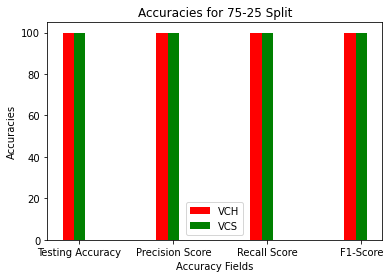

,Classifier,Testing Accuracy,Precision Score,Recall Score,F1-Score
0,Voting Classification Soft,99.832683,99.741602,99.677211,99.709396
1,Voting Classification Hard,99.944228,99.870968,99.935442,99.903195


In [8]:
def Main_VC():
    
    SKF_Split(4)
    acc1=VotingHard_Classification()
    acc2=VotingSoft_Classification()

    
        
    Accuracy_Table=[('Voting Classification Soft',acc2[0],acc2[1],acc2[2],acc2[3]),
                ('Voting Classification Hard',acc1[0],acc1[1],acc1[2],acc1[3]),
               ]
    Result_table=pd.DataFrame(Accuracy_Table,columns=["Classifier","Testing Accuracy","Precision Score","Recall Score","F1-Score"])
    
    N = 4
    ind = np.arange(N) 
    width = 0.12

    VCH_vals = [acc1[0],acc1[1],acc1[2],acc1[3]]
    bar1 = plt.bar(ind, VCH_vals, width, color = 'r')

    VCS_vals = [acc2[0],acc2[1],acc2[2],acc2[3]]
    bar2 = plt.bar(ind+width, VCS_vals, width, color='g')
    
        
    plt.xlabel("Accuracy Fields")
    plt.ylabel("Accuracies")
    plt.title("Accuracies for 75-25 Split")

    plt.xticks(ind+width,['TA', 'PS', 'RS', 'F1-S'])
    plt.legend( (bar1, bar2), ('VCH','VCS') )
    plt.show()
    
    return Result_table
Main_VC()